In [20]:
import numpy as np
import pandas as pd
import skimage
from sklearn.cluster import KMeans
from skimage.io import imread
import pylab
import math

In [2]:
image = imread('parrots.jpg')

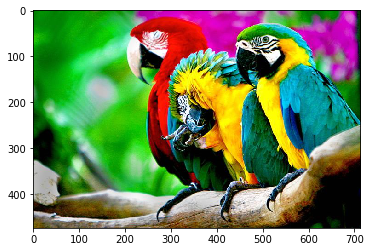

In [3]:
pylab.imshow(image)

In [8]:
image_float = skimage.img_as_float(image)

In [9]:
print(image_float)

[[[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21960784 0.00784314]
  [0.         0.20784314 0.03137255]
  [0.00784314 0.21568627 0.04313725]]

 [[0.01568627 0.49411765 0.01960784]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20784314 0.03137255]
  [0.         0.20392157 0.03137255]]

 [[0.01176471 0.49019608 0.01568627]
  [0.00784314 0.49411765 0.00784314]
  [0.00784314 0.49411765 0.00784314]
  ...
  [0.         0.21176471 0.00392157]
  [0.         0.20392157 0.03137255]
  [0.         0.2        0.03137255]]

 ...

 [[0.4745098  0.37647059 0.01568627]
  [0.44705882 0.35686275 0.        ]
  [0.45098039 0.36862745 0.01176471]
  ...
  [0.03137255 0.08235294 0.10588235]
  [0.04705882 0.10196078 0.14509804]
  [0.05098039 0.10980392 0.18431373]]

 [[0.45490196 0.34901961 0.        ]
  [0.47843137 0.38039216 0.01960784]


In [13]:
r = image_float[:, :, 0].ravel()
g = image_float[:, :, 1].ravel()
b = image_float[:, :, 2].ravel()
rgb = np.transpose(np.vstack((r, g, b)))
print(rgb)

[0.01568627 0.00784314 0.00784314 ... 0.02352941 0.08235294 0.0745098 ]
[[0.01568627 0.49411765 0.01960784]
 [0.00784314 0.49411765 0.00784314]
 [0.00784314 0.49411765 0.00784314]
 ...
 [0.02352941 0.09019608 0.11764706]
 [0.08235294 0.16078431 0.20392157]
 [0.0745098  0.16470588 0.23529412]]


In [14]:
kM = KMeans(init = 'k-means++', random_state = 241)
kM.fit(rgb)
cl = kM.labels_
colors_avg = kM.cluster_centers_
print(colors_avg)

[[0.05406099 0.11689505 0.05043359]
 [0.78781572 0.82326519 0.79806684]
 [0.95428402 0.82764685 0.04104736]
 [0.45229667 0.66631255 0.44145983]
 [0.09575687 0.63581725 0.06700343]
 [0.61269973 0.21448057 0.06337206]
 [0.77703693 0.09103536 0.69019608]
 [0.04568045 0.55170208 0.59895701]]


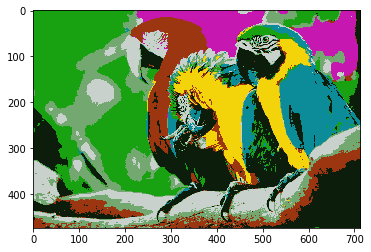

In [16]:
cl_img = np.reshape(cl, (-1, 713))
img_new = np.copy(image_float)
for cluster in range(0, kM.n_clusters):
    img_new[cl_img == cluster] = colors_avg[cluster]
pylab.imshow(img_new)

[0.05406099247067464, 0.11689504944665435, 0.05043358971440051]
[0.7878157183226002, 0.8232651929625805, 0.7980668380986082]
[0.9542840193954596, 0.827646846420441, 0.04104735982907465]
[0.45229666976885635, 0.6663125517700679, 0.44145982646865334]
[0.09575687227608415, 0.6358172468686646, 0.06700343003933959]
[0.612699727778409, 0.21448056530901188, 0.0633720624399054]
[0.777036931066835, 0.09103536174582877, 0.6901960784313881]
[0.04568045039809909, 0.5517020755783981, 0.5989570056750497]


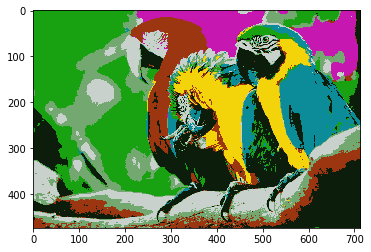

In [18]:
img_new_1 = np.copy(image_float)
for cluster in range(0, kM.n_clusters):
    median_r = np.median(img_new[:, :, 0][cl_img == cluster])
    median_g = np.median(img_new[:, :, 1][cl_img == cluster])
    median_b = np.median(img_new[:, :, 2][cl_img == cluster])
    print([median_r, median_g, median_b])
    img_new_1[cl_img == cluster] = [median_r, median_g, median_b]
pylab.imshow(img_new_1)

In [21]:
def PSNR(image1, image2):
    """Function calculates PSNR metrics between two images"""
    mse = np.mean((image1 - image2) ** 2)
    psnr = 10 * math.log10(np.max(image1) / mse)
    return psnr

In [22]:
print(PSNR(image_float, img_new))

18.436819103300206


1 9.818835544771291
2 12.08017030530436
3 13.15347121293569
4 14.36780769396911
5 15.527127647188168
6 16.543992608344684
7 17.640985921681636
8 18.436819103300206
9 19.11266313654821
10 19.64074048747428
11 20.12758357097769
12 20.592506619385627
13 21.021371526439076
14 21.296835210936745
15 21.60715895078718
16 21.86310428154254
17 22.119797787617372
18 22.335486977005612
19 22.522084161476307
20 22.699052532431057


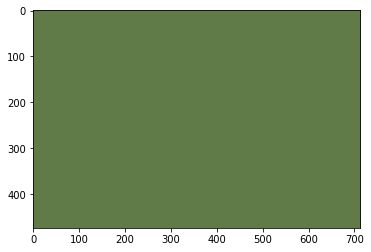

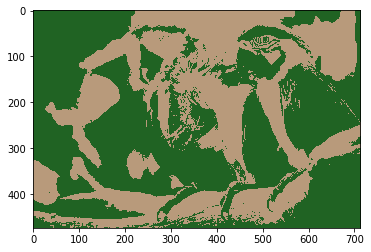

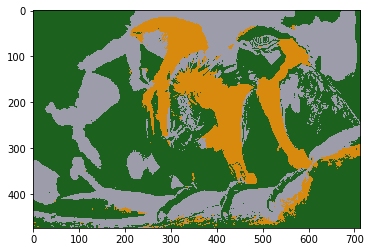

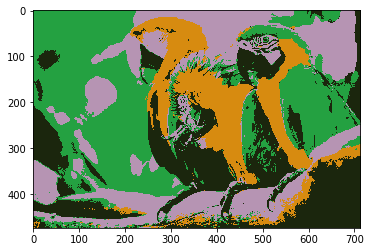

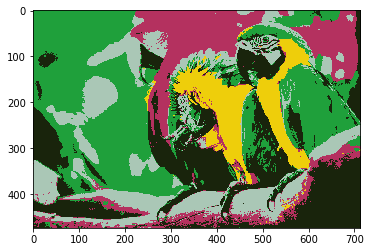

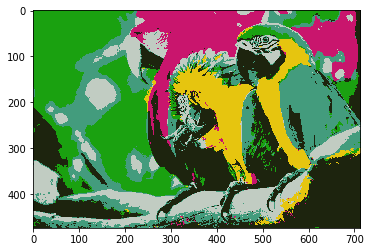

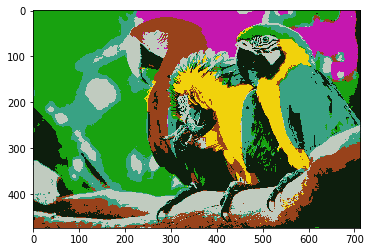

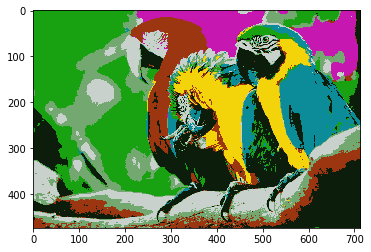

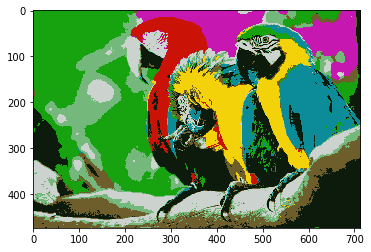

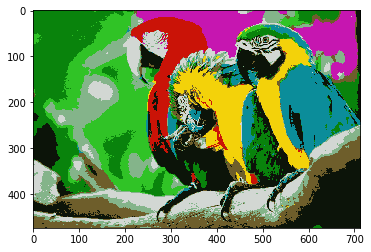

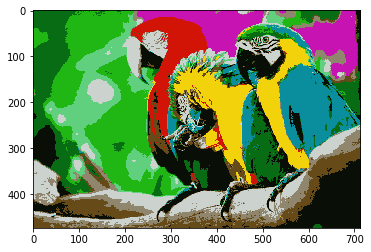

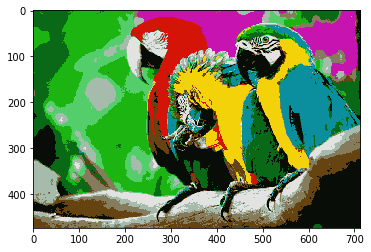

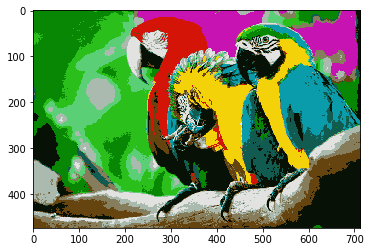

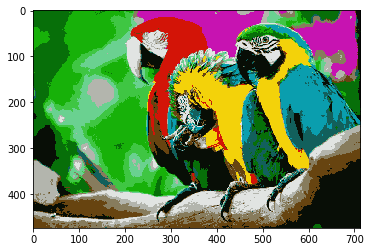

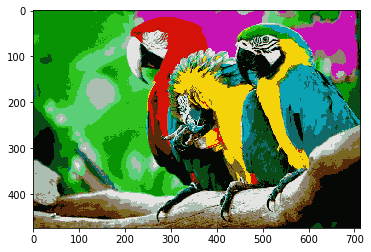

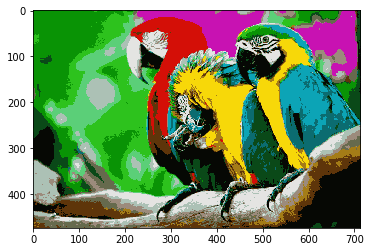

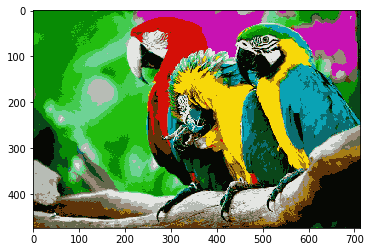

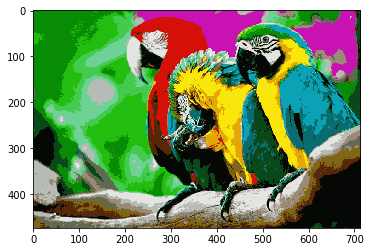

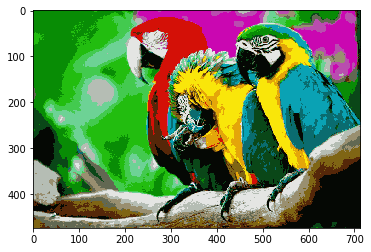

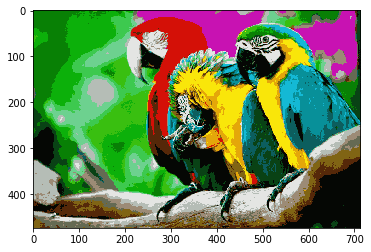

In [23]:
for i in range(1, 21):
    kM = KMeans(n_clusters = i, init = 'k-means++', random_state = 241)
    kM.fit(rgb)
    cl = kM.labels_
    colors_avg = kM.cluster_centers_
    cl_img = np.reshape(cl, (-1, 713))
    img_new = np.copy(image_float)
    for cluster in range(0, i):
        img_new[cl_img == cluster] = colors_avg[cluster]
    print(i, PSNR(image_float, img_new))
    pylab.figure()
    pylab.imshow(img_new)